In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
import sklearn as sk

In [3]:
df = pd.read_csv("Datasets2\PrimaIndiansDataset.csv")
df.columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
def draw_hist(dataframe):
    for column in dataframe.columns:
        print(column)
        plt.figure()
        dataframe[column].hist()

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f"Distribution of {column}")
        plt.show()

In [5]:
print(df.info(verbose=True,memory_usage=False))
print("Null values =",df.isnull().values.any())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)None
Null values = False
(768, 9)


In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print(df.head())
print(df.tail())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766    

[268, 500]


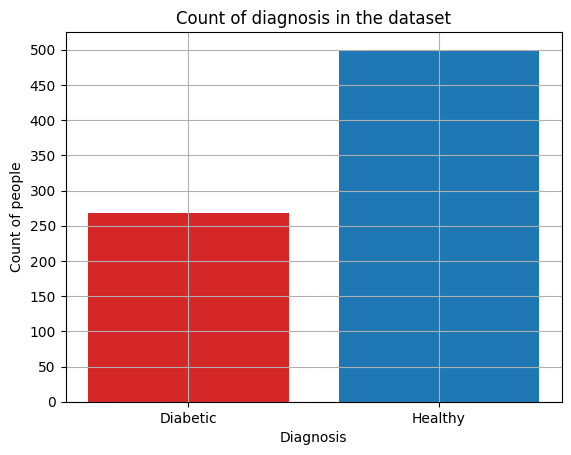

In [8]:

outcomes = ("Diabetic","Healthy")
outcome_counts = [len(df.loc[df['Outcome']==1]), len(df.loc[df['Outcome']==0])]
print(outcome_counts)
# display as a graph

colours=['tab:red', 'tab:blue']

fig, ax = plt.subplots()

ax.bar(outcomes, outcome_counts, color=colours)

ax.set_ylabel("Count of people")
ax.set_xlabel("Diagnosis")
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50)) # Y axis increments at 50 
plt.title('Count of diagnosis in the dataset')
plt.grid()
plt.show()

In [9]:
#exploring number of 0 values
INempty_val = df.loc[df['Insulin'] == 0]
print("Insulin 0 =",len(INempty_val))

BMIempty_val=df.loc[df['BMI']==0]
print("BMI 0 =",len( BMIempty_val))

Gempty_val=df.loc[df['Glucose']==0]
print("Glucose 0 =",len( Gempty_val))

BPempty_val=df.loc[df['BloodPressure']==0]
print("BP 0 = ",len(BPempty_val))

STempty_val=df.loc[df['SkinThickness']==0]
print("Skin thickness 0 = ", len(STempty_val))

# create graph




Insulin 0 = 374
BMI 0 = 11
Glucose 0 = 5
BP 0 =  35
Skin thickness 0 =  227


Correlation Matrix 

Correlation matrix =


<Axes: >

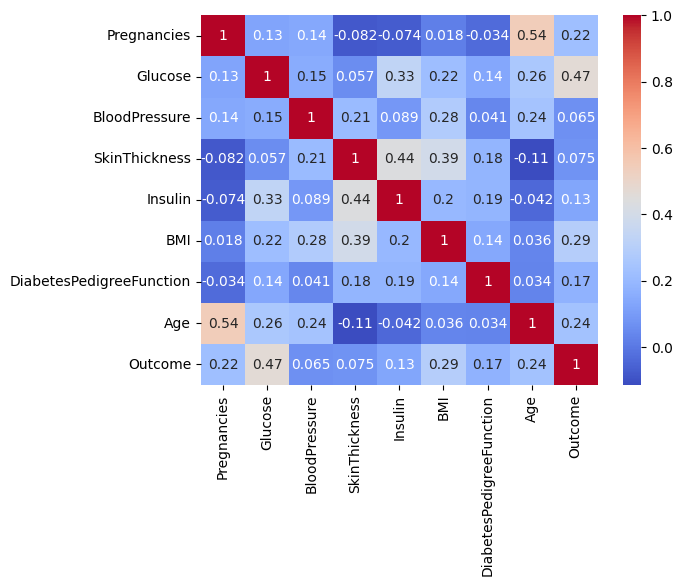

In [10]:
matrix = df.corr()
print ("Correlation matrix =")
sns.heatmap(matrix,cmap='coolwarm',annot=True)


Histograms displaying distribution of feature values 


In [11]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Pregnancies


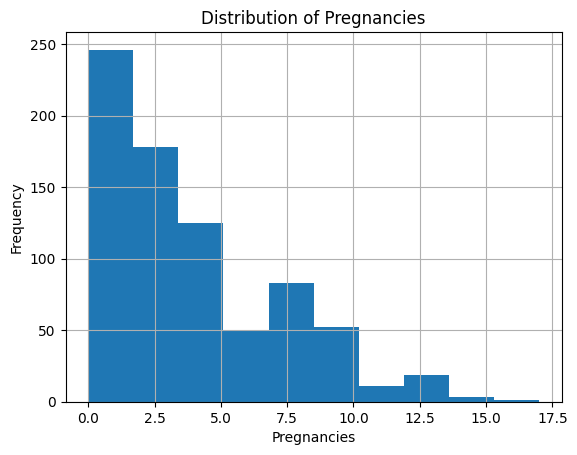

Glucose


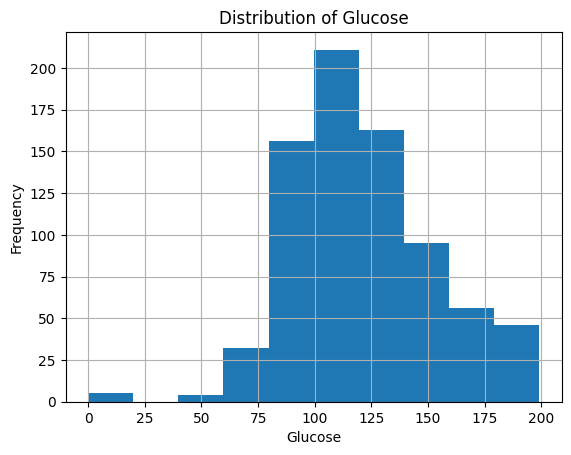

BloodPressure


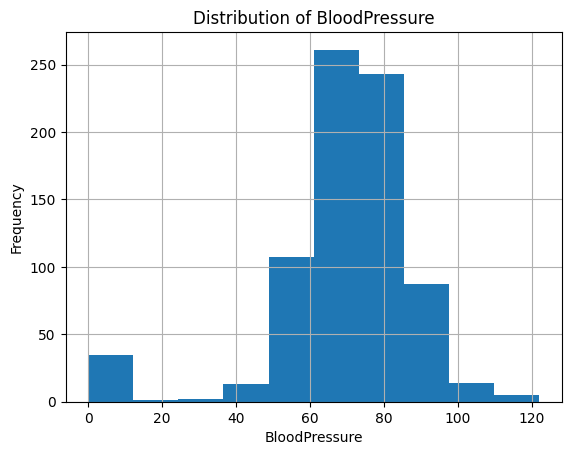

SkinThickness


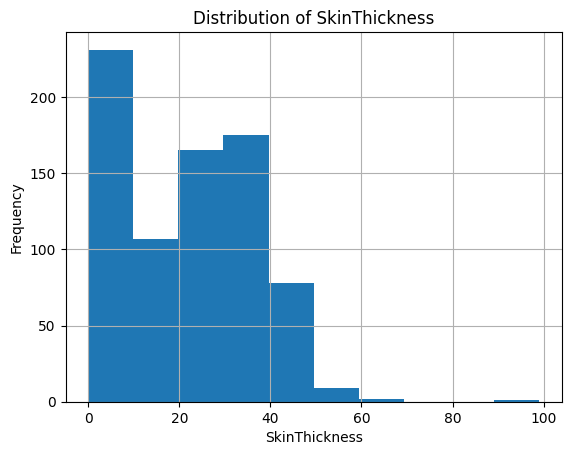

Insulin


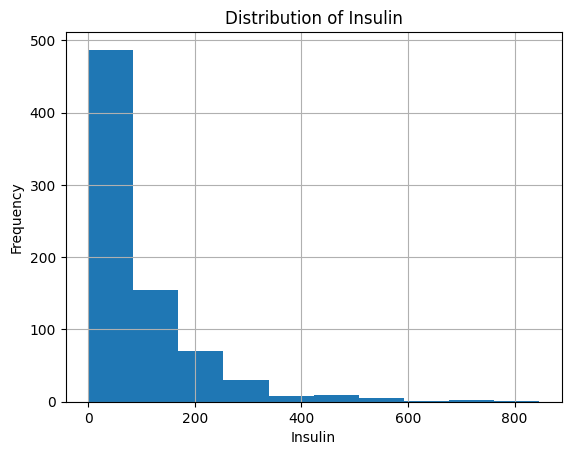

BMI


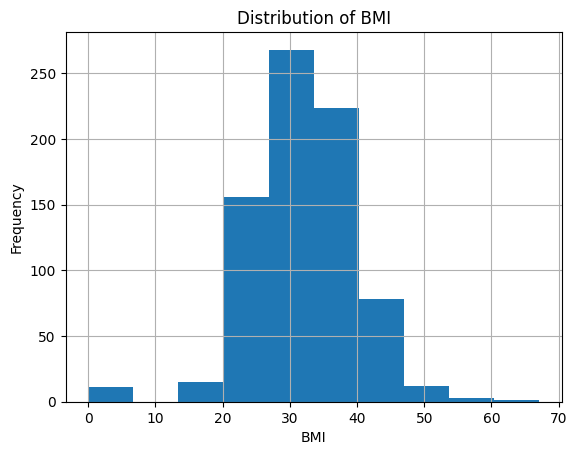

DiabetesPedigreeFunction


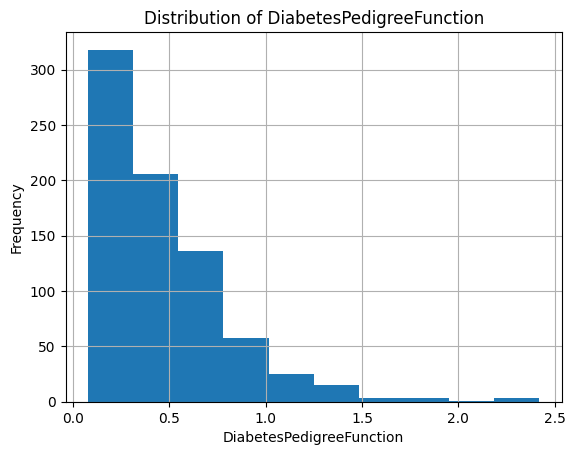

Age


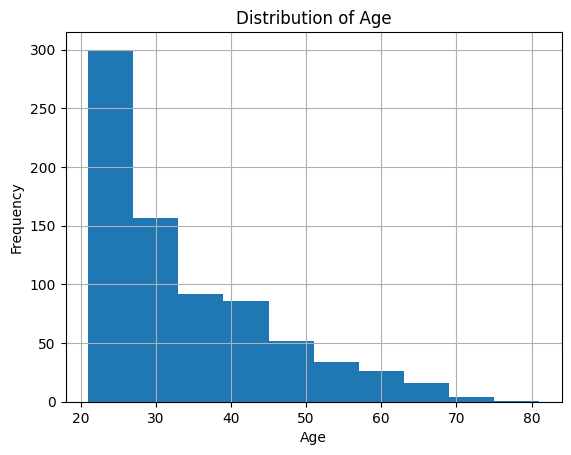

Outcome


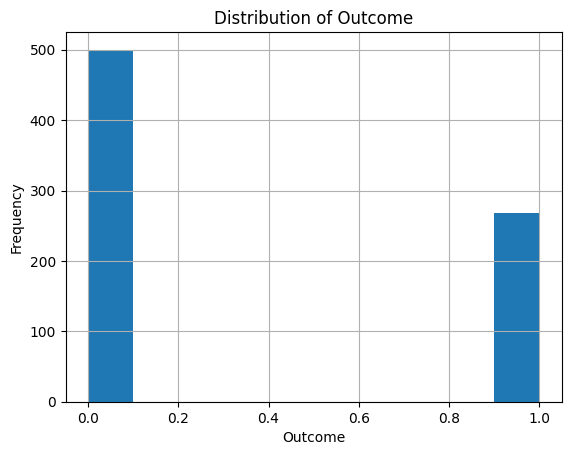

In [12]:

draw_hist(df)


Comparing distrubution of features that contain 0 values
- First create a copy of the dataframe
- Then convert the 0 values to null
- Then create a list of features that contain values
- Display histogram for features 

In [13]:
df_copy = df.copy(deep=True)

In [14]:

empty_columns = []
for column in df_copy.columns:
    if (df_copy[column] == 0).any():
        empty_columns.append(column)

empty_columns.remove("Pregnancies")
empty_columns.remove("Outcome")
print(empty_columns)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


Convert 0 values in above features to null

In [15]:
df_copy['Glucose']= df_copy['Glucose'].replace(0,np.nan)
df_copy['BloodPressure']= df_copy['BloodPressure'].replace(0,np.nan)
df_copy['SkinThickness']= df_copy['SkinThickness'].replace(0,np.nan)
df_copy['BMI']= df_copy['BMI'].replace(0,np.nan)
df_copy['Insulin'] =df_copy['Insulin'].replace(0,np.nan)


Statisical Analysis of the updated data

In [16]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
INnan_val = df_copy['Insulin'].isna().sum()
print("Insulin 0 =",INnan_val)

BMInan_val=df_copy['BMI'].isna().sum()
print("BMI 0 =",BMInan_val)

Gnan_val=df_copy['Glucose'].isna().sum()
print("Glucose 0 =",Gnan_val)

BPnan_val=df_copy['BloodPressure'].isna().sum()
print("BP 0 = ",BPnan_val)

STnan_val=df_copy['SkinThickness'].isna().sum()
print("Skin thickness 0 = ", STnan_val)


Insulin 0 = 374
BMI 0 = 11
Glucose 0 = 5
BP 0 =  35
Skin thickness 0 =  227


Distrubution of updates features as histograms

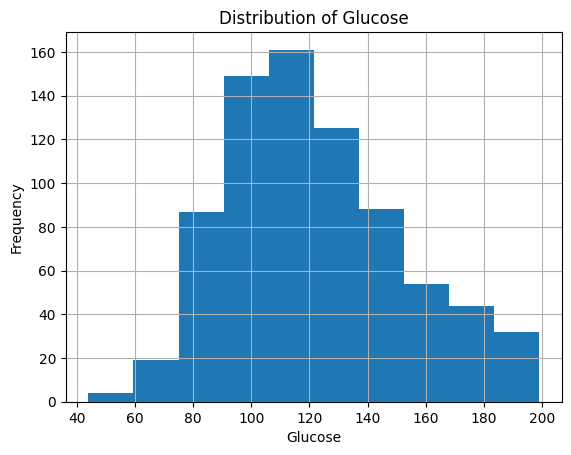

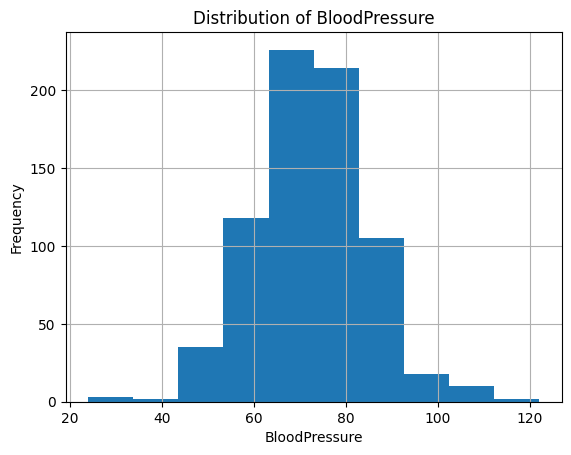

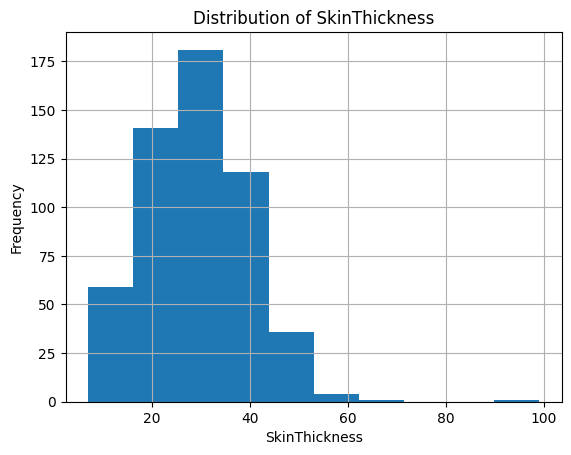

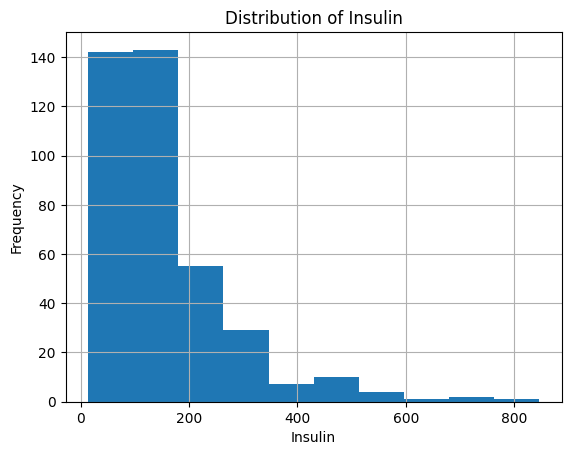

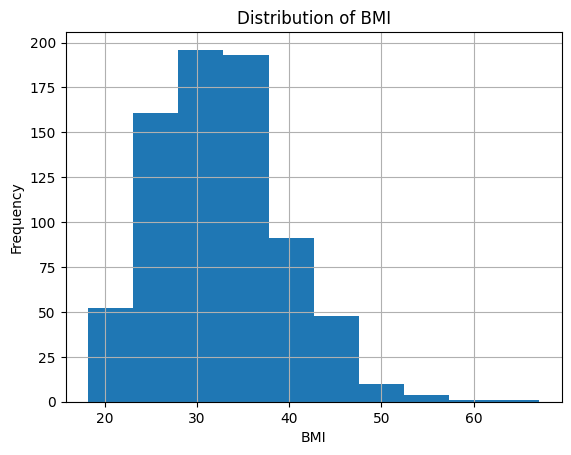

In [18]:
def draw_hist2(dataframe,cols):
    for column in cols:
        plt.figure()
        dataframe[column].hist()

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f"Distribution of {column}")
        plt.show()
# had to be reworked only display specfic vals 



draw_hist2(df_copy,empty_columns)


Mean implementation for Glucose and Blood Pressure

In [19]:
Gmean=(df_copy['Glucose'].mean())
BPmean = (df_copy['BloodPressure'].mean())

df_copy['Glucose']= df_copy['Glucose'].replace(np.nan,Gmean)
df_copy['BloodPressure']= df_copy['BloodPressure'].replace(np.nan,BPmean)



Median Implementation for bmi, skin thickness and insulin

In [20]:
BMImedian=(df_copy['BMI'].median())
STmedian = (df_copy['SkinThickness'].median())
Imedian=(df_copy['Insulin'].median())

df_copy['BMI'] = df_copy['BMI'].replace(np.nan,BMImedian)
df_copy['SkinThickness'] = df_copy['SkinThickness'].replace(np.nan,STmedian)
df_copy['Insulin'] = df_copy['Insulin'].replace(np.nan,Imedian)





View the distrubtion and correlation after inputting the mean and median values

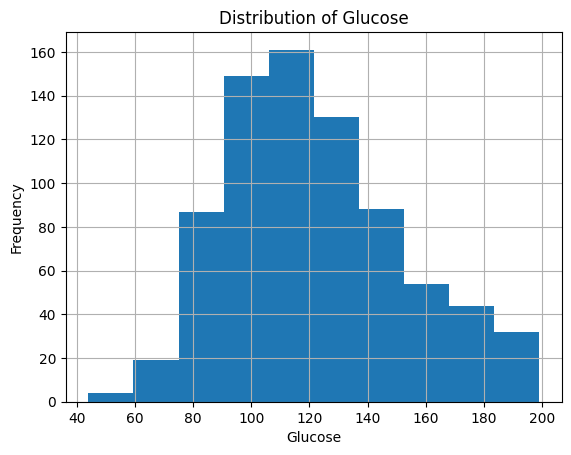

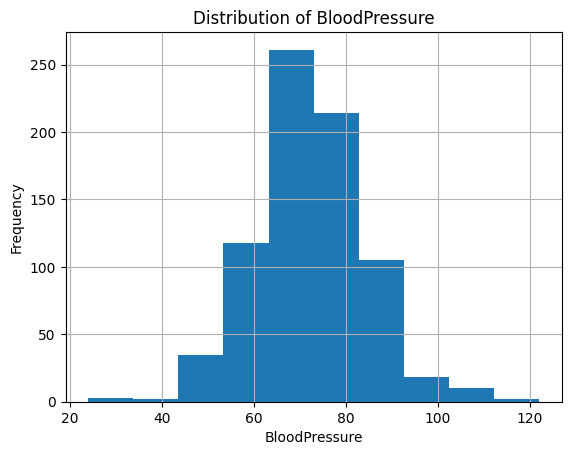

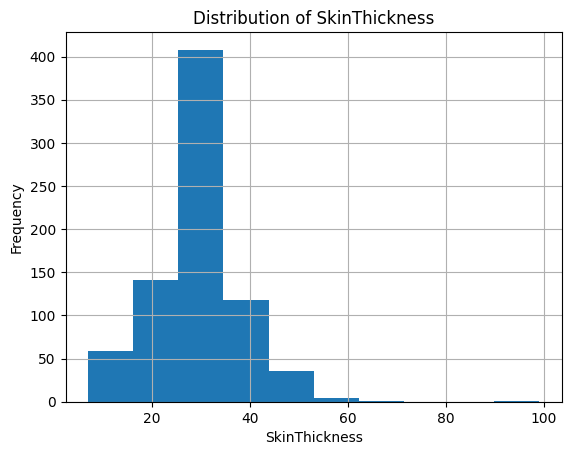

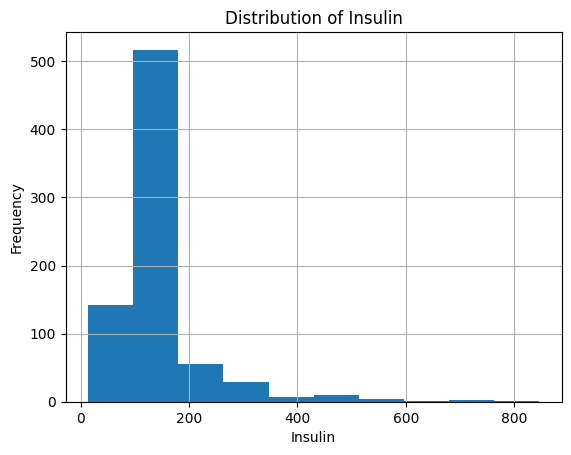

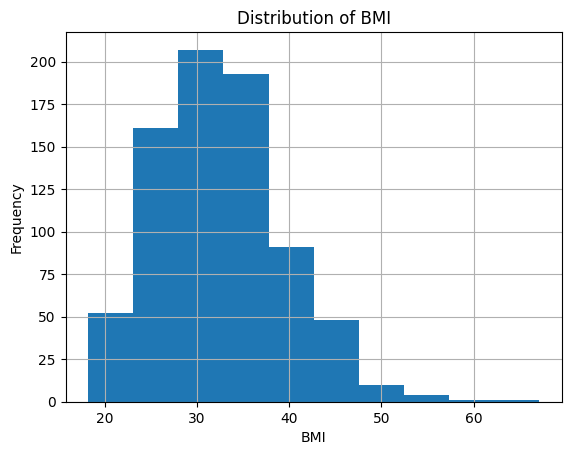

In [21]:
def draw_hist2(dataframe,cols):
    for column in cols:
        plt.figure()
        dataframe[column].hist()

        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f"Distribution of {column}")
        plt.show()
# had to be reworked only display specfic vals 



draw_hist2(df_copy,empty_columns)

Correlation matrix =


<Axes: >

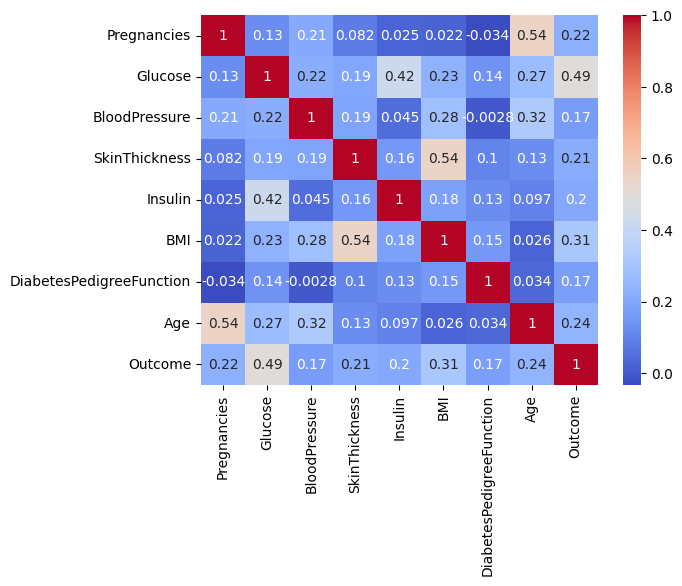

In [22]:
#correlation after removing NaN vals
matrix = df_copy.corr()
print ("Correlation matrix =")
sns.heatmap(matrix,cmap='coolwarm',annot=True)

In [23]:
print(df_copy.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

Data outlier detection 

<Figure size 1200x600 with 0 Axes>

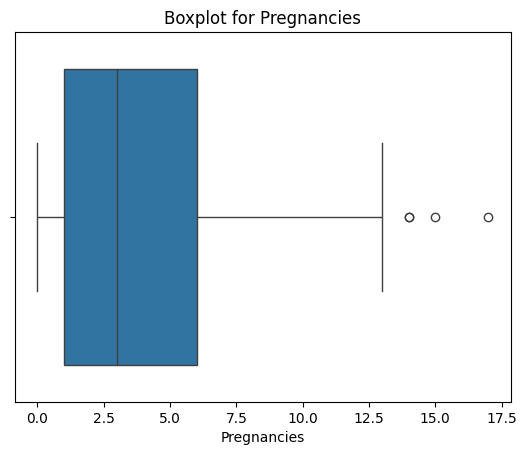

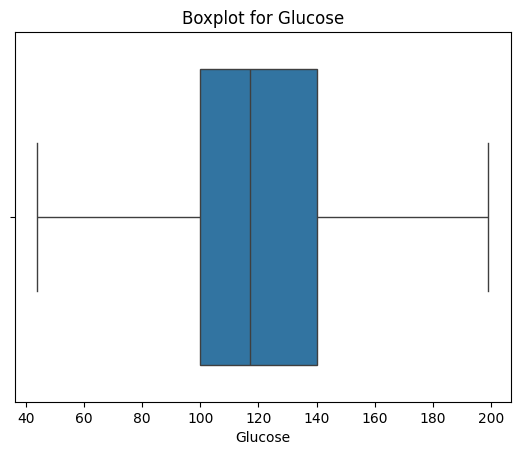

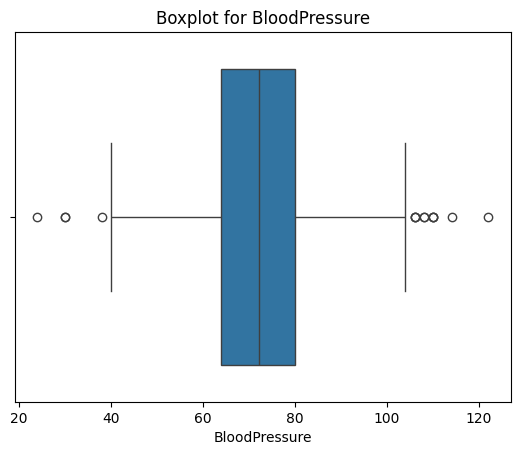

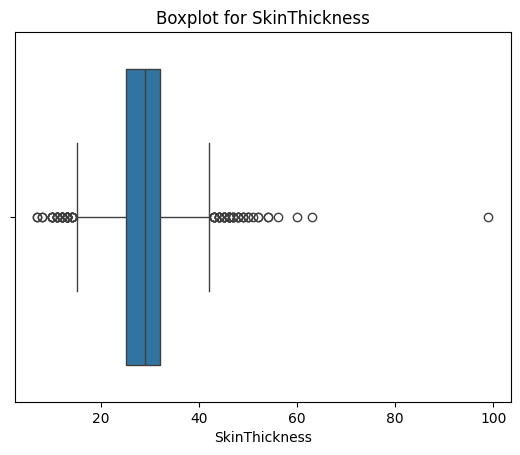

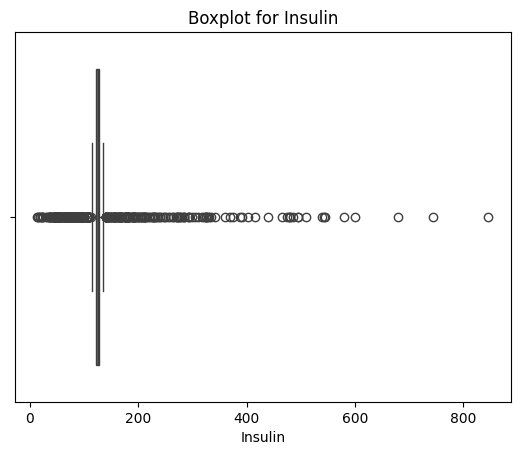

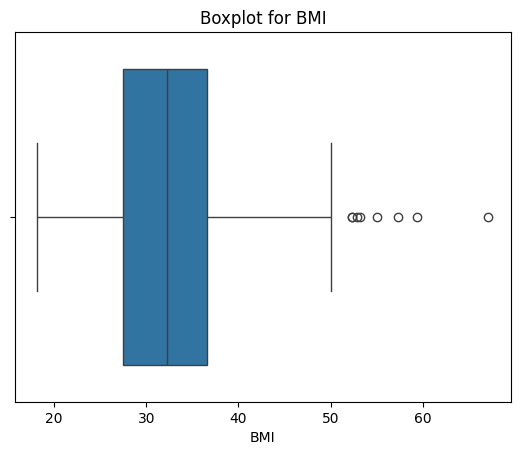

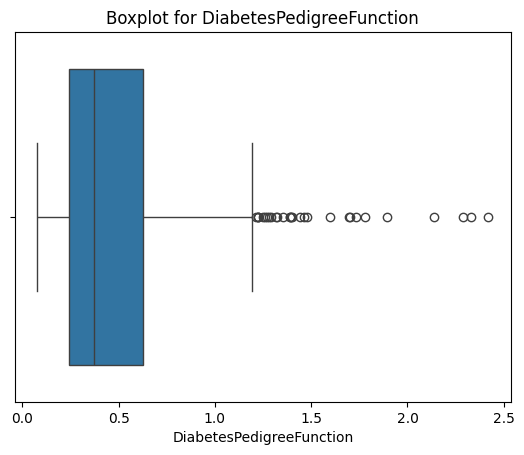

In [24]:
#Boxplot 

outlier_columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

def draw_box(dataframe,cols):
    plt.figure(figsize=(12,6))
    for column in cols:
        plt.figure()
        sns.boxplot(dataframe,x=column)
        plt.title(f"Boxplot for {column}")
        plt.show()
# had to be reworked only display specfic vals 



draw_box(df_copy,outlier_columns)

In [25]:
df_copy2=df_copy
"""
Criteria for outlier
- Datapoint that is more than 1.5 times the IQR above or below the data(if the data is skewed)
- or more than 3SD however relies on data being normally distrubuted 

Used the IQR range method as much of the data is not normally distrubuted and therefore the Z score method will be impacted by the outliers
"""

outlier_columnscount =[]

for column in outlier_columns:
    Q1 = df_copy2[column].quantile(0.25)
    Q3 = df_copy2[column].quantile(0.75)
    IQR = Q3 - Q1

    lowerbound = Q1 - (1.5 * IQR)
    upperbound = Q3 + (1.5 * IQR)

    outliers = df_copy2[(df_copy2[column] < lowerbound) | (df_copy2[column] > upperbound)][column]

    print (column,len(outliers.tolist()))





Pregnancies 4
Glucose 0
BloodPressure 14
SkinThickness 87
Insulin 346
BMI 8
DiabetesPedigreeFunction 29


Splitting the data into feature and target (Altered dataset)


In [26]:
df_Smote = df_copy.copy(deep=True)

# Creating a copy of the processed dataset in which smote will be applied

# splits the orginal dataset into target and featues

# Splits the processed dataset
x_copy = df_copy.drop('Outcome', axis=1)
y_copy = df_copy['Outcome']


#Splits the smote applied dataset 
x_s = df_Smote.drop('Outcome', axis= 1)
y_s = df_Smote['Outcome']

x_s2 = df_Smote.drop('Outcome', axis= 1)
y_s2 = df_Smote['Outcome']



[500, 500]


C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


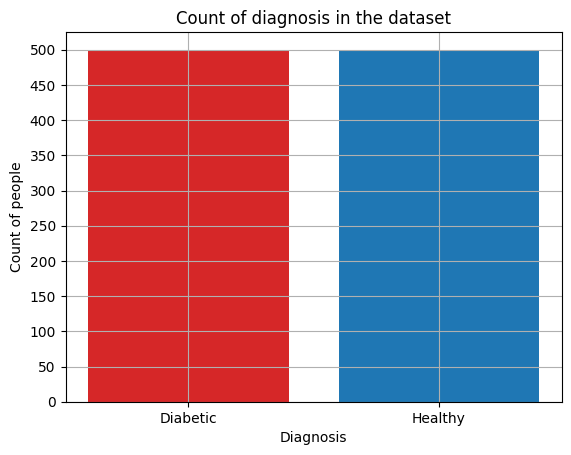

In [27]:
from imblearn.over_sampling import SMOTE

#test
df_test =  df_copy.copy(deep=True)
x_t = df_test.drop('Outcome', axis= 1)
y_t = df_test['Outcome']



smoteT = SMOTE(sampling_strategy='auto', random_state= 42)

x_re, y_re = smoteT.fit_resample(x_t,y_t)

outcomes = ("Diabetic","Healthy")
outcome_counts = [len(y_re[y_re==1]), len(y_re[y_re==0])]
print(outcome_counts)
# display as a graph

colours=['tab:red', 'tab:blue']

fig, ax = plt.subplots()

ax.bar(outcomes, outcome_counts, color=colours)

ax.set_ylabel("Count of people")
ax.set_xlabel("Diagnosis")
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50)) # Y axis increments at 50 
plt.title('Count of diagnosis in the dataset')
plt.grid()
plt.show()



Creating list of models 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogisticRegression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5), # 5 is the default 
    "DT": DecisionTreeClassifier(),
    "SVM": SVC(),
    "GNB": GaussianNB(),
    "RF" : RandomForestClassifier()
    
}


Preparing K fold algorithm & Smote

In [29]:
#Intially split the data in 10 folds as this is a commonly used value
kf = KFold(n_splits=10,shuffle=True)
smote = SMOTE(sampling_strategy='auto')


"""

for fold, (train_index, test_index) in enumerate(kf.split(x_s, y_s)):
    print(f"Fold {fold + 1}")

    # Splitting data into training and testing sets
    X_train, X_test = x_s.iloc[train_index], x_s.iloc[test_index]
    y_train, y_test = y_s.iloc[train_index], y_s.iloc[test_index]
    
    print("Class distrubution before:", y_s.value_counts().to_dict())
    print("-"*30)
   
    
    
    x_train_resampled, y_train_resampled = smote.fit_resample(x_s, y_s)

    
    # Show the class distribution after SMOTE
    print("Class distribution after SMOTE:", y_s.value_counts().to_dict())
    print("-" * 30)
    """


'\n\nfor fold, (train_index, test_index) in enumerate(kf.split(x_s, y_s)):\n    print(f"Fold {fold + 1}")\n\n    # Splitting data into training and testing sets\n    X_train, X_test = x_s.iloc[train_index], x_s.iloc[test_index]\n    y_train, y_test = y_s.iloc[train_index], y_s.iloc[test_index]\n    \n    print("Class distrubution before:", y_s.value_counts().to_dict())\n    print("-"*30)\n   \n    \n    \n    x_train_resampled, y_train_resampled = smote.fit_resample(x_s, y_s)\n\n    \n    # Show the class distribution after SMOTE\n    print("Class distribution after SMOTE:", y_s.value_counts().to_dict())\n    print("-" * 30)\n    '

Saving the trained models in a dictionary

Creating the pipeline 

 Processed dataset no Smote

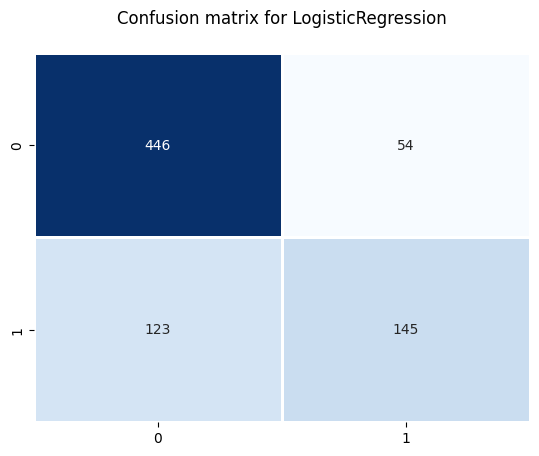

####################################
Classfication report for LogisticRegression
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.73      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



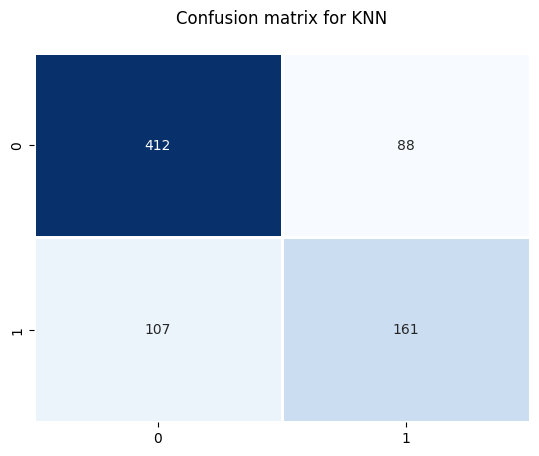

####################################
Classfication report for KNN
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       500
           1       0.65      0.60      0.62       268

    accuracy                           0.75       768
   macro avg       0.72      0.71      0.72       768
weighted avg       0.74      0.75      0.74       768



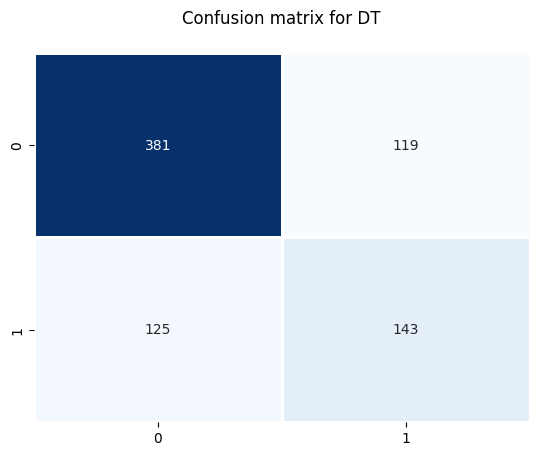

####################################
Classfication report for DT
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       500
           1       0.55      0.53      0.54       268

    accuracy                           0.68       768
   macro avg       0.65      0.65      0.65       768
weighted avg       0.68      0.68      0.68       768



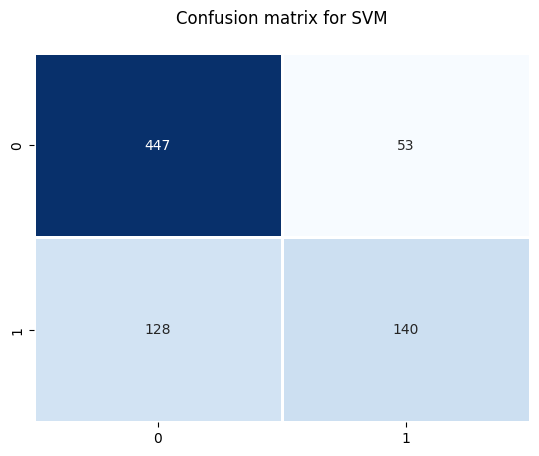

####################################
Classfication report for SVM
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.73      0.52      0.61       268

    accuracy                           0.76       768
   macro avg       0.75      0.71      0.72       768
weighted avg       0.76      0.76      0.75       768



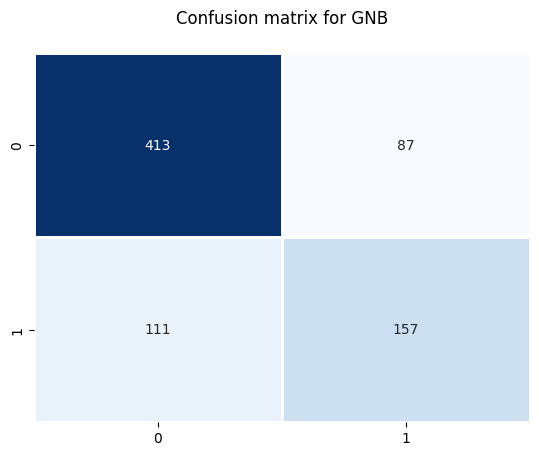

####################################
Classfication report for GNB
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       500
           1       0.64      0.59      0.61       268

    accuracy                           0.74       768
   macro avg       0.72      0.71      0.71       768
weighted avg       0.74      0.74      0.74       768



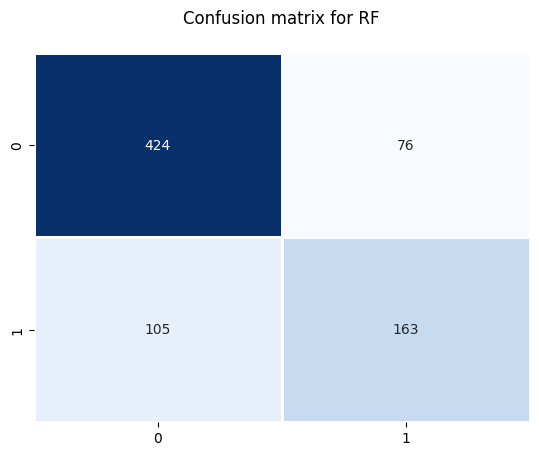

####################################
Classfication report for RF
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       500
           1       0.68      0.61      0.64       268

    accuracy                           0.76       768
   macro avg       0.74      0.73      0.73       768
weighted avg       0.76      0.76      0.76       768



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



for name, m in models.items():
    pipeline = Pipeline([('scaler', MinMaxScaler())
                         ,('classifier', m)
                         
                         ])

    y_pred = cross_val_predict(pipeline,x_copy,y_copy,cv=kf,)

    confusionM = confusion_matrix(y_copy,y_pred)
    sns.heatmap(confusionM, annot= True, cmap= 'Blues', fmt= "d",cbar= False, linewidths= 1)
    plt.title (f"Confusion matrix for {name}\n")
    plt.show()


    print("####################################")
    print(f"Classfication report for {name}")
    print(classification_report(y_copy,y_pred))
    # add variance 

    

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LogisticRegression())])


Smote Dataset with Smote applied at each K fold 

C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_da

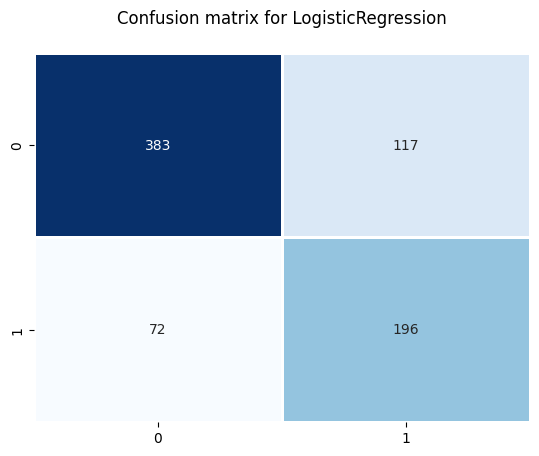

Classification report for LogisticRegression
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       500
           1       0.63      0.73      0.67       268

    accuracy                           0.75       768
   macro avg       0.73      0.75      0.74       768
weighted avg       0.77      0.75      0.76       768

####################################


C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_da

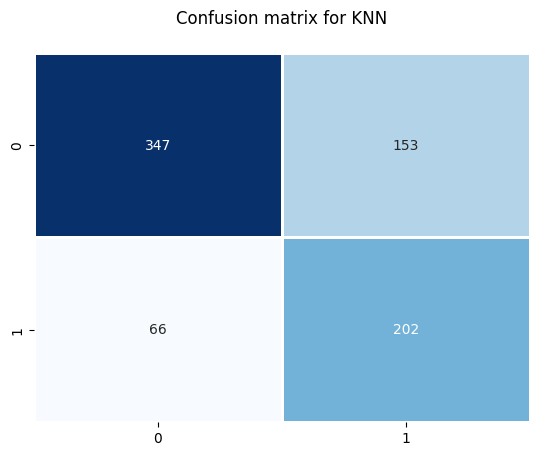

Classification report for KNN
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       500
           1       0.57      0.75      0.65       268

    accuracy                           0.71       768
   macro avg       0.70      0.72      0.70       768
weighted avg       0.75      0.71      0.72       768

####################################


C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_da

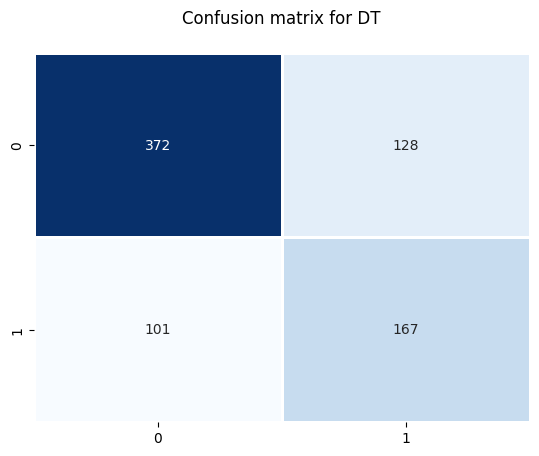

Classification report for DT
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       500
           1       0.57      0.62      0.59       268

    accuracy                           0.70       768
   macro avg       0.68      0.68      0.68       768
weighted avg       0.71      0.70      0.70       768

####################################


C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_da

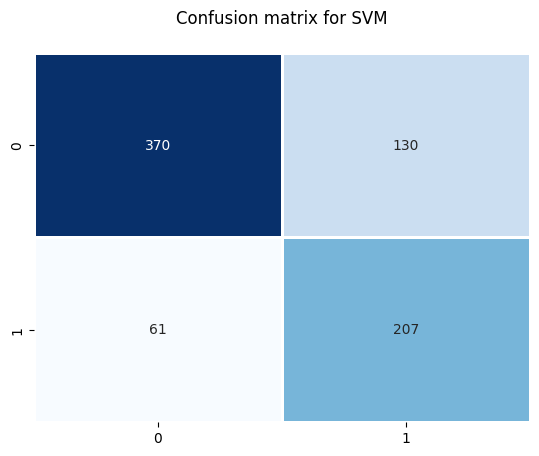

Classification report for SVM
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       500
           1       0.61      0.77      0.68       268

    accuracy                           0.75       768
   macro avg       0.74      0.76      0.74       768
weighted avg       0.77      0.75      0.76       768

####################################


C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_da

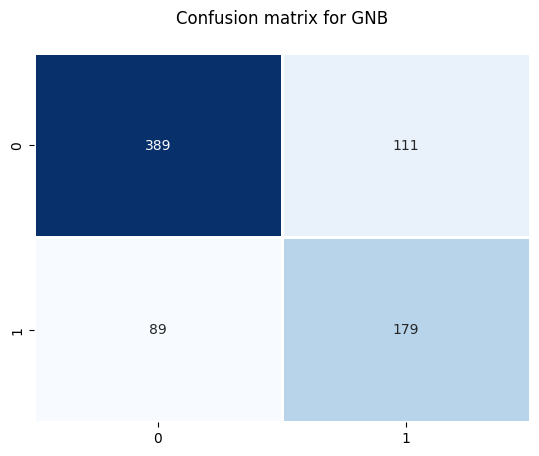

Classification report for GNB
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       500
           1       0.62      0.67      0.64       268

    accuracy                           0.74       768
   macro avg       0.72      0.72      0.72       768
weighted avg       0.75      0.74      0.74       768

####################################


C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_da

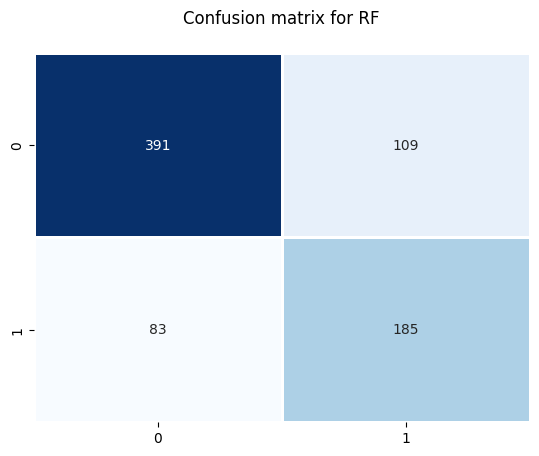

Classification report for RF
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       500
           1       0.63      0.69      0.66       268

    accuracy                           0.75       768
   macro avg       0.73      0.74      0.73       768
weighted avg       0.76      0.75      0.75       768

####################################


In [31]:
 #not correct as smote is applied before the splitting into test and train
# therefore their is data leakage, need to fix

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as PipelineS




for name, model in models.items():
    pipeline = PipelineS([
        ('smote', smote),  
        ('scaler', MinMaxScaler()),
        ('classifier', model)
    ])
    
    y_pred2 = cross_val_predict(pipeline, x_s, y_s, cv=kf)

    # Confusion matrix
    confusionM = confusion_matrix(y_s, y_pred2)
    sns.heatmap(confusionM, annot=True, cmap='Blues', fmt="d", cbar=False, linewidths=1)
    plt.title(f"Confusion matrix for {name}\n")
    plt.show()

    # Classification report
    print(f"Classification report for {name}")
    print(classification_report(y_s, y_pred2))
    print("####################################")

Smote Dataset with Smote applied before k fold splitting

C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Outcome, dtype: float64
1000


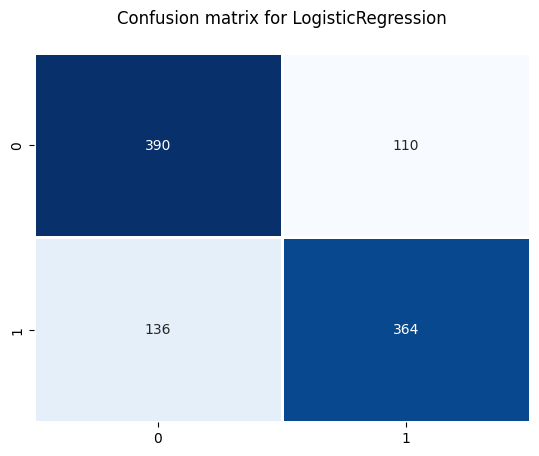

Classfication report for LogisticRegression
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       500
           1       0.77      0.73      0.75       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000

####################################
1000


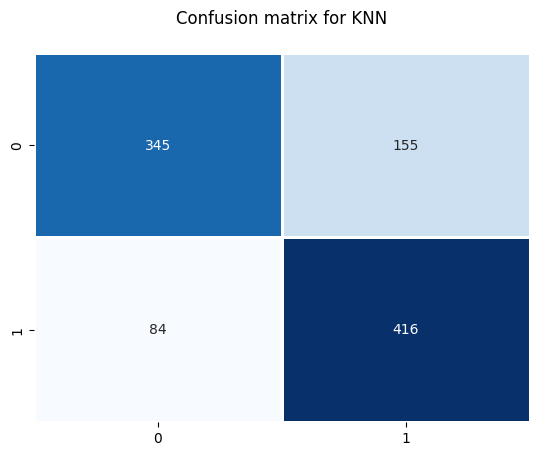

Classfication report for KNN
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       500
           1       0.73      0.83      0.78       500

    accuracy                           0.76      1000
   macro avg       0.77      0.76      0.76      1000
weighted avg       0.77      0.76      0.76      1000

####################################
1000


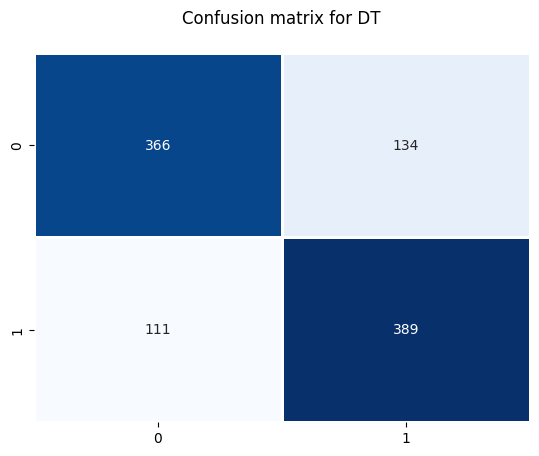

Classfication report for DT
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       500
           1       0.74      0.78      0.76       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.75      1000
weighted avg       0.76      0.76      0.75      1000

####################################
1000


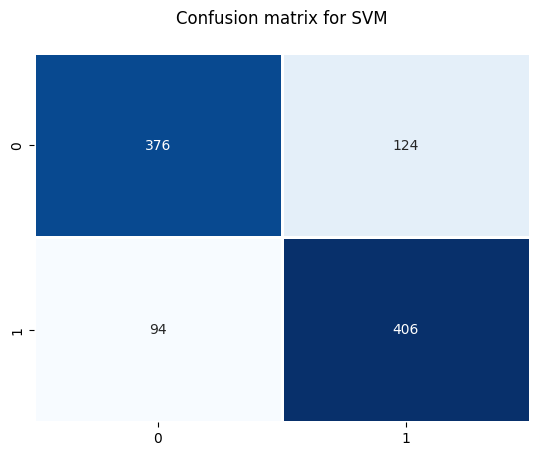

Classfication report for SVM
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       500
           1       0.77      0.81      0.79       500

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

####################################
1000


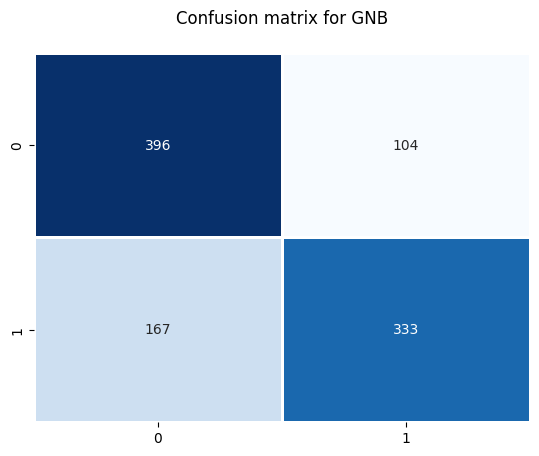

Classfication report for GNB
              precision    recall  f1-score   support

           0       0.70      0.79      0.75       500
           1       0.76      0.67      0.71       500

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000

####################################
1000


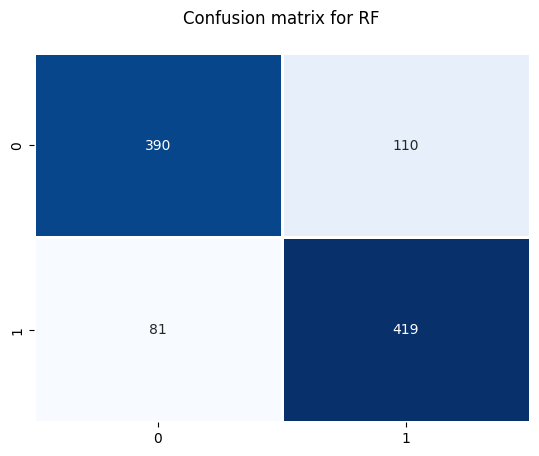

Classfication report for RF
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       500
           1       0.79      0.84      0.81       500

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000

####################################


In [ ]:
# not correct as smote is applied before the splitting into test and train
# therefore their is data leakage, need to fix

x_resample, y_resample = smote.fit_resample(x_s2, y_s2)


for name, m in models.items():
    pipeline = PipelineS([('scaler', MinMaxScaler()),
                         ('classifier', m)
                         
                       ])
    
   

   
    y_pred3 = cross_val_predict(pipeline,x_resample,y_resample,cv=kf)
    print(len(y_pred3))
    
    

    
    confusionM = confusion_matrix(y_resample,y_pred3)
    sns.heatmap(confusionM, annot= True, cmap= 'Blues', fmt= "d",cbar= False, linewidths= 1)
    plt.title (f"Confusion matrix for {name}\n")
    plt.show()
  

    print(f"Classfication report for {name}")
    print(classification_report(y_resample,y_pred3))
    print("####################################")
    # add variance 
    
  

Undersampling of dataset

[268, 268]


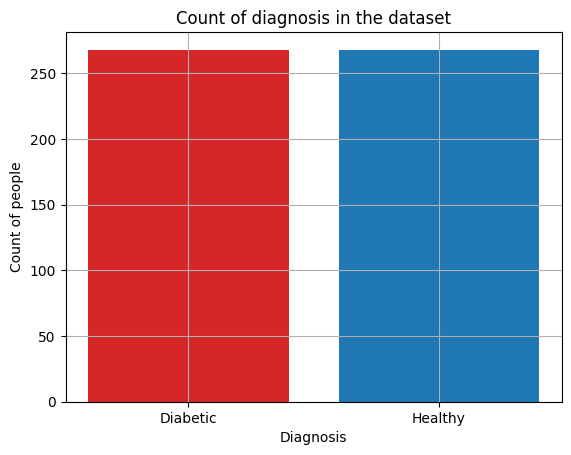

In [33]:
# Total of minority class 
healthy_count = df_copy['Outcome'].value_counts().min()

# sample from the majority class 
df_majority = df_copy[df_copy['Outcome'] == 0].sample(n = healthy_count)
df_minority = df_copy[df_copy['Outcome'] == 1]

df_unders = pd.concat([df_majority,df_minority])


outcome_counts2 = [len(df_unders.loc[df['Outcome']==1]), len(df_unders.loc[df['Outcome']==0])]
print(outcome_counts2)
# display as a graph

colours=['tab:red', 'tab:blue']

fig, ax = plt.subplots()

ax.bar(outcomes, outcome_counts2, color=colours)

ax.set_ylabel("Count of people")
ax.set_xlabel("Diagnosis")
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50)) # Y axis increments at 50 
plt.title('Count of diagnosis in the dataset')
plt.grid()
plt.show()


# Split the df into features and target
x_us = df_unders.drop('Outcome', axis= 1) 
y_us = df_unders['Outcome']
 

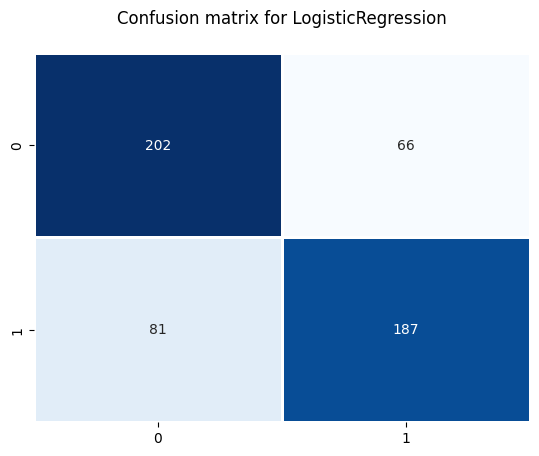

####################################
Classfication report for LogisticRegression
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       268
           1       0.74      0.70      0.72       268

    accuracy                           0.73       536
   macro avg       0.73      0.73      0.73       536
weighted avg       0.73      0.73      0.73       536



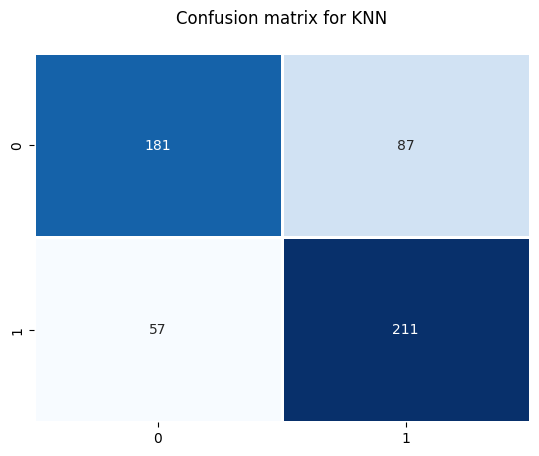

####################################
Classfication report for KNN
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       268
           1       0.71      0.79      0.75       268

    accuracy                           0.73       536
   macro avg       0.73      0.73      0.73       536
weighted avg       0.73      0.73      0.73       536



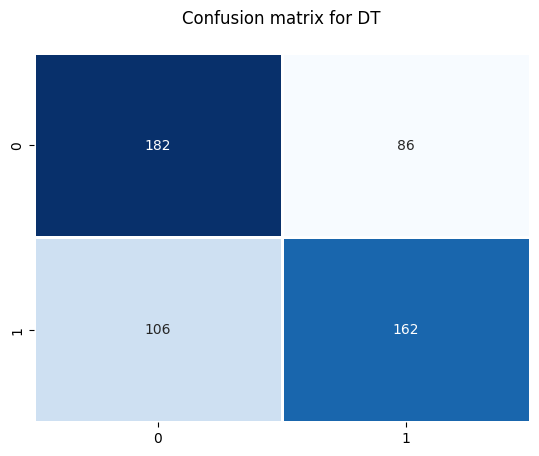

####################################
Classfication report for DT
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       268
           1       0.65      0.60      0.63       268

    accuracy                           0.64       536
   macro avg       0.64      0.64      0.64       536
weighted avg       0.64      0.64      0.64       536



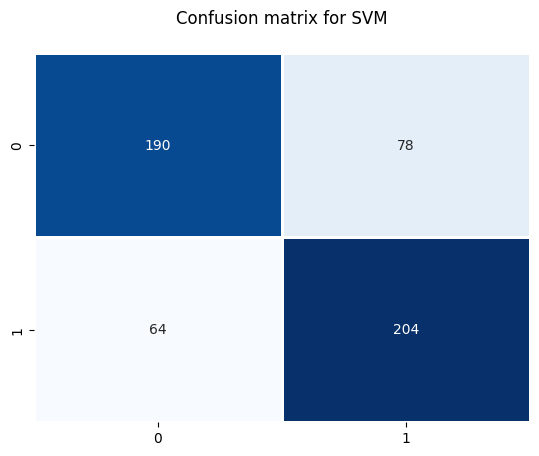

####################################
Classfication report for SVM
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       268
           1       0.72      0.76      0.74       268

    accuracy                           0.74       536
   macro avg       0.74      0.74      0.73       536
weighted avg       0.74      0.74      0.73       536



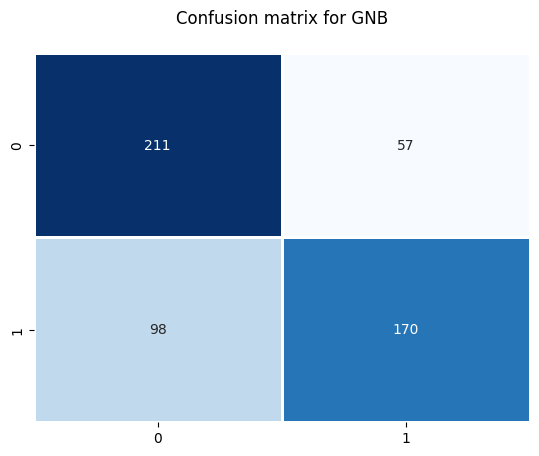

####################################
Classfication report for GNB
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       268
           1       0.75      0.63      0.69       268

    accuracy                           0.71       536
   macro avg       0.72      0.71      0.71       536
weighted avg       0.72      0.71      0.71       536



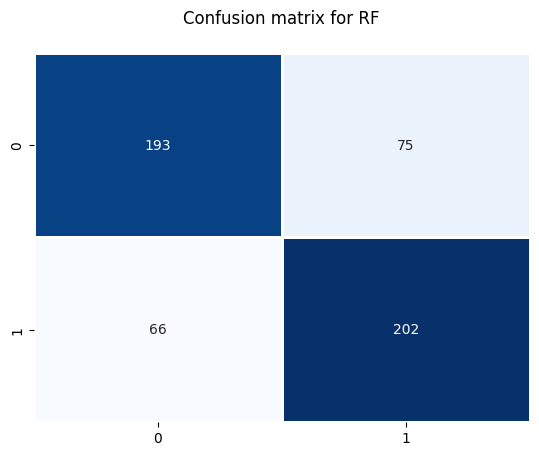

####################################
Classfication report for RF
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       268
           1       0.73      0.75      0.74       268

    accuracy                           0.74       536
   macro avg       0.74      0.74      0.74       536
weighted avg       0.74      0.74      0.74       536



In [34]:
for name, m in models.items():
    pipeline = Pipeline([('scaler', MinMaxScaler())
                         ,('classifier', m)
                         ])

    y_pred4 = cross_val_predict(pipeline,x_us,y_us,cv=kf,)

    confusionM = confusion_matrix(y_us,y_pred4)
    sns.heatmap(confusionM, annot= True, cmap= 'Blues', fmt= "d",cbar= False, linewidths= 1)
    plt.title (f"Confusion matrix for {name}\n")
    plt.show()


    print("####################################")
    print(f"Classfication report for {name}")
    print(classification_report(y_us,y_pred4))
    # add variance

  


   

Compare performance over different increments of data

In [ ]:
# Initilisation code 
from sklearn.model_selection import cross_val_score

increments = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Sets the random seed to 42 which helps make results more reproducable 
np.random.seed(42)


Original dataset

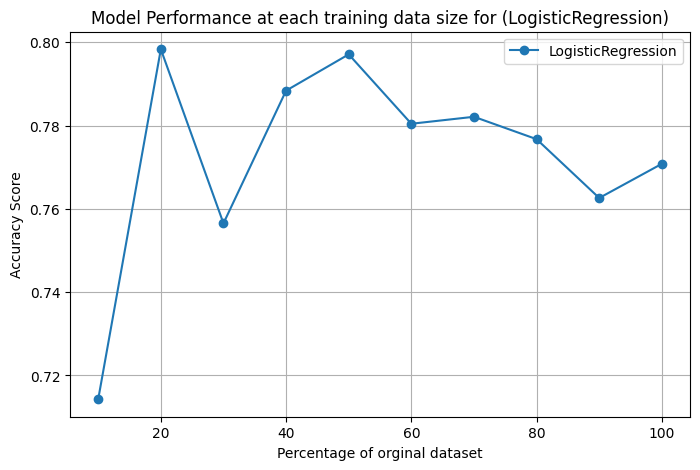

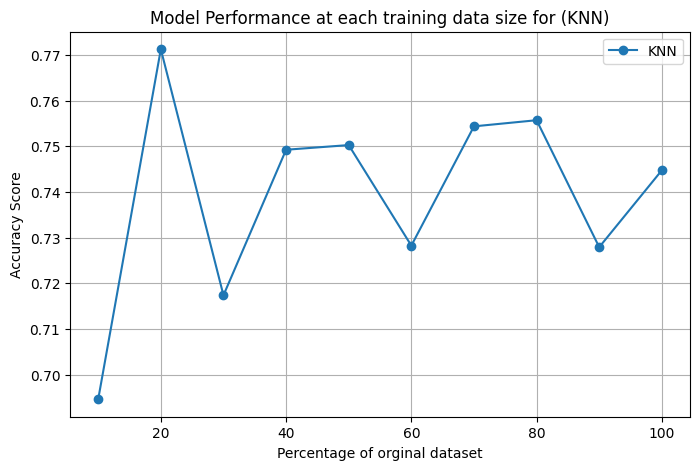

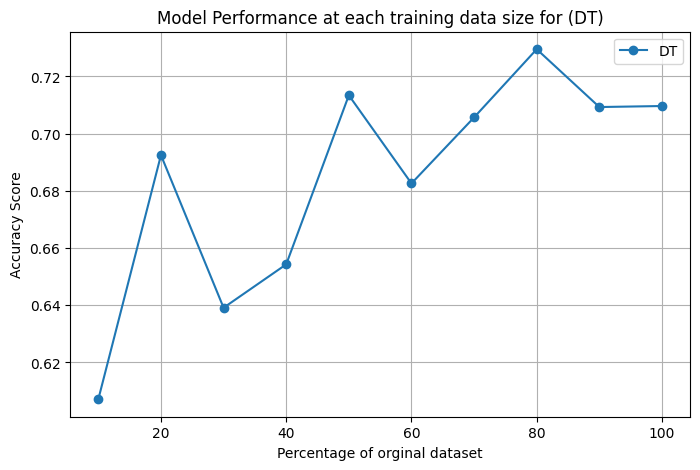

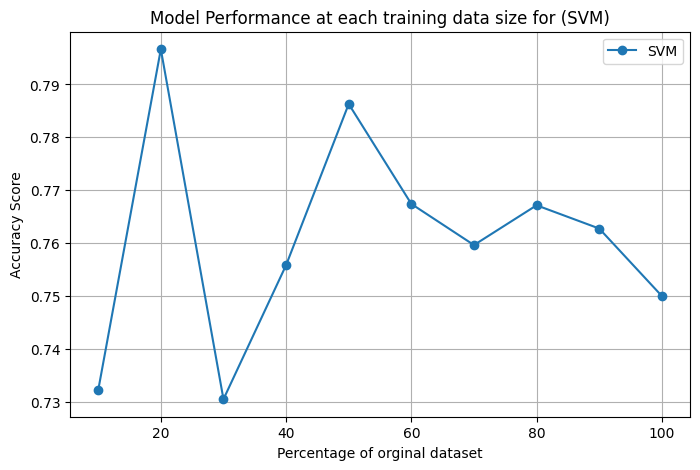

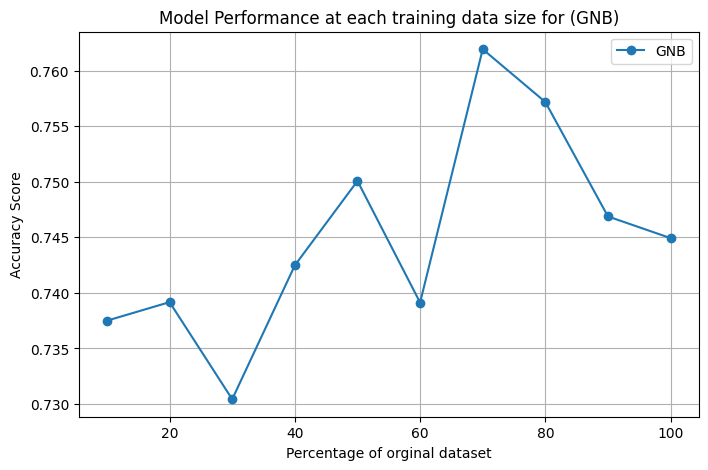

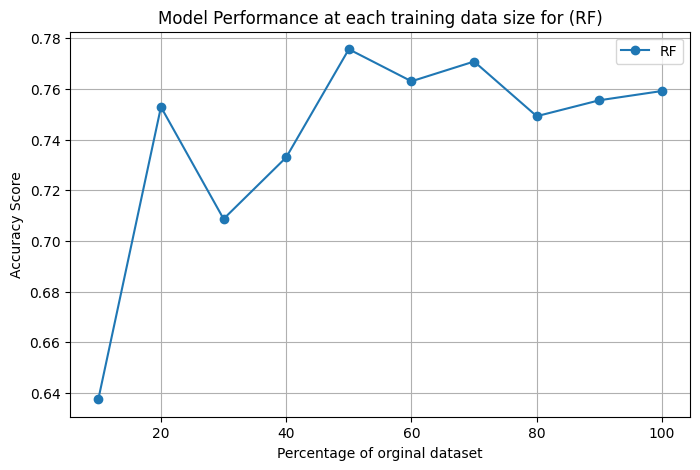

In [88]:
results = {"LogisticRegression": [],
           "KNN":[],
           "DT":[],
           "SVM":[],
           "GNB":[],
           "RF":[]
          }

for size in increments:
    sample_size = int(len(x_copy) * size)
    # x_copy has same amount of data as the normal dataframe 

    df_sampled = df_copy.sample(n = sample_size, random_state= 42)

    x_sampled = df_sampled.drop(columns=['Outcome'])
    y_sampled = df_sampled['Outcome']

    for name, m in models.items():

        pipeline = Pipeline([('scaler', MinMaxScaler())
                         ,('classifier', m)
                         ])
        
        
        scores = cross_val_score(pipeline, x_sampled, y_sampled, cv=kf)
        m_scores = np.mean(scores) # Gets the mean value of the scores on each of the 9 training folds
        results[name].append(m_scores)
        
      
        
        


for name, scores in results.items():
    plt.figure(figsize=(8, 5))
    plt.plot([x * 100 for x in increments],scores, marker = "o" ,label=name)

    plt.xlabel("Percentage of orginal dataset")
    plt.ylabel("Accuracy Score")
    plt.title(f"Model Performance at each training data size for ({name})")
    plt.legend()
    plt.grid(True)

    plt.show()

76
153
230
307
384
460
537
614
691
768


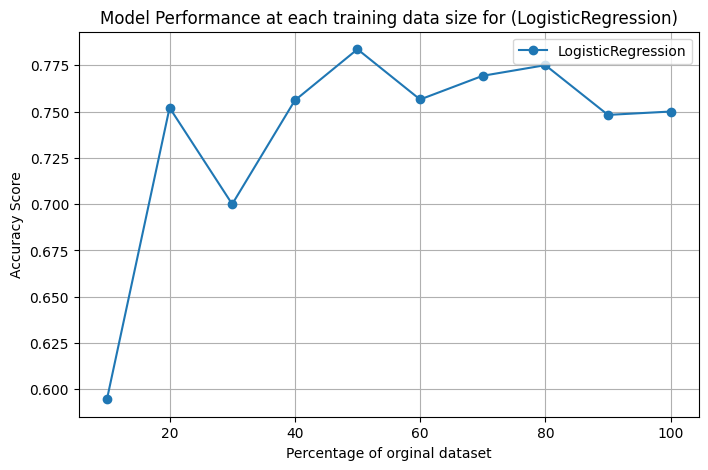

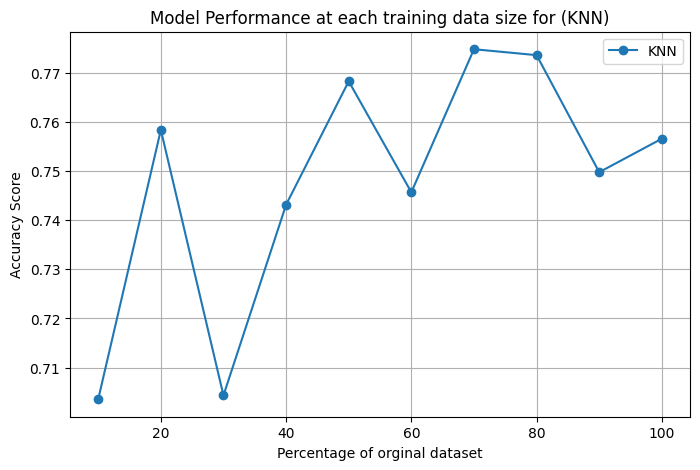

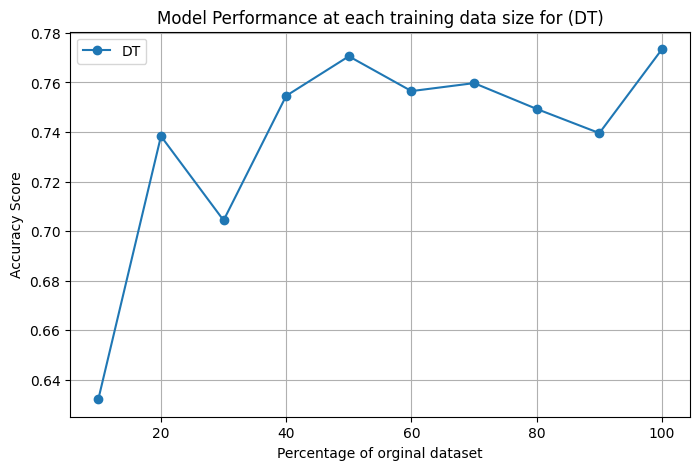

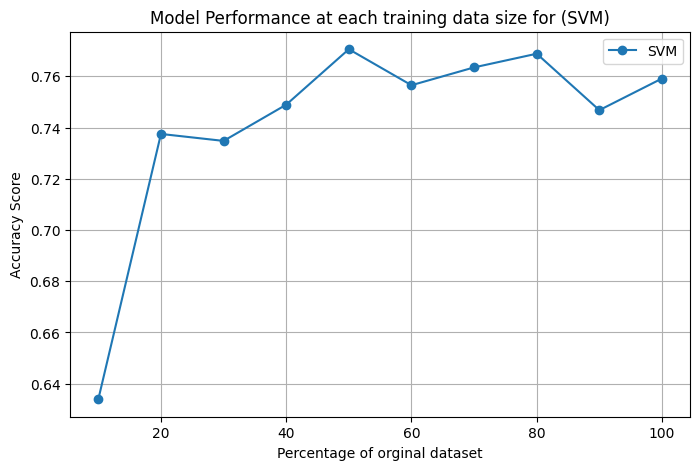

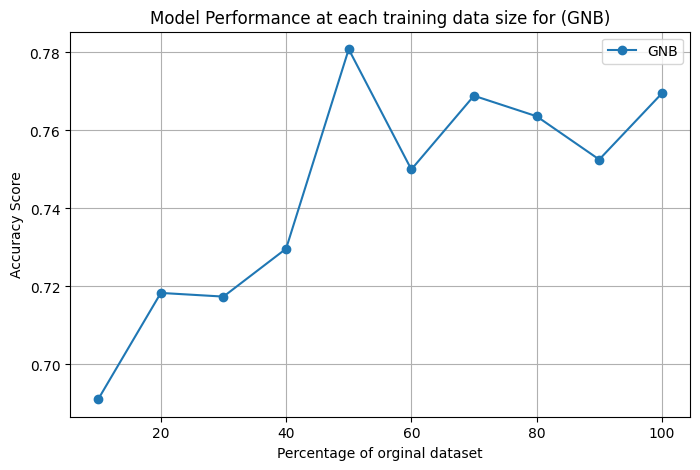

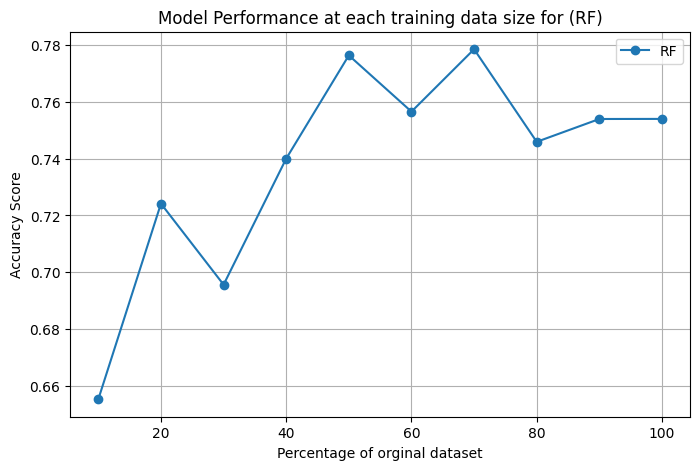

In [87]:
results = {"LogisticRegression": [],
           "KNN":[],
           "DT":[],
           "SVM":[],
           "GNB":[],
           "RF":[]
          }

for size in increments:
    sample_size = int(len(x_copy) * size)
    # x_copy has same amount of data as the normal dataframe 
    print(sample_size)

    df_sampled = df_copy.sample(n = sample_size, random_state= 42)

    x_sampled = df_sampled.drop(columns=['Outcome'])
    y_sampled = df_sampled['Outcome']

    for name, m in trained_models.items():
        scores = cross_val_score(pipeline, x_sampled, y_sampled, cv=kf)
        m_scores = np.mean(scores) # Gets the mean value of the scores on each of the 9 training folds
        results[name].append(m_scores)
        
      
        
        


for name, scores in results.items():
    plt.figure(figsize=(8, 5))
    plt.plot([x * 100 for x in increments],scores, marker = "o" ,label=name)

    plt.xlabel("Percentage of orginal dataset")
    plt.ylabel("Accuracy Score")
    plt.title(f"Model Performance at each training data size for ({name})")
    plt.legend()
    plt.grid(True)

    plt.show()
        

Smote Applied at each K fold

C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\aaron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_da

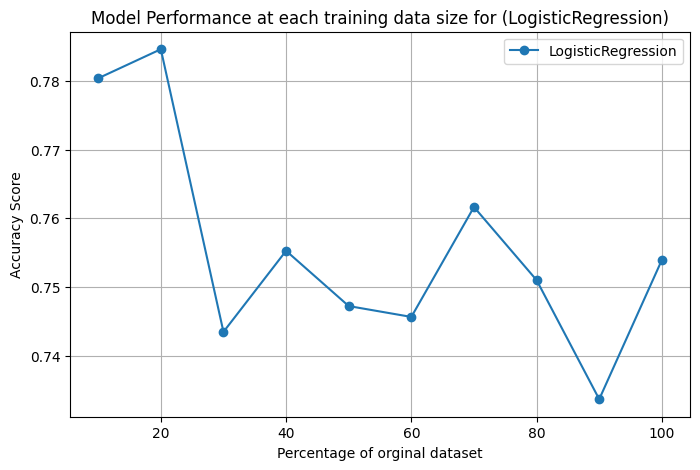

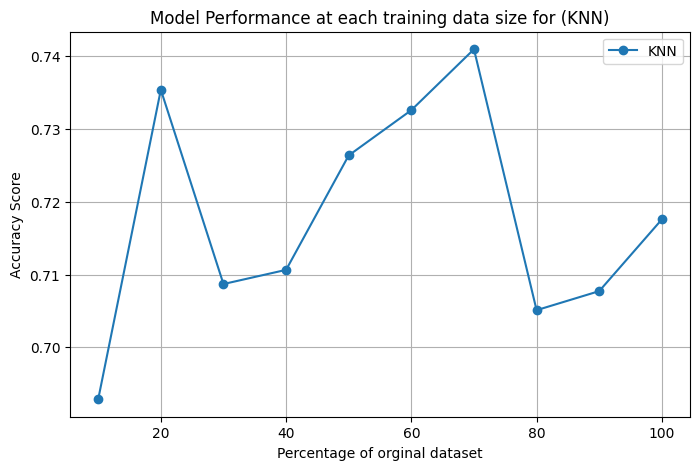

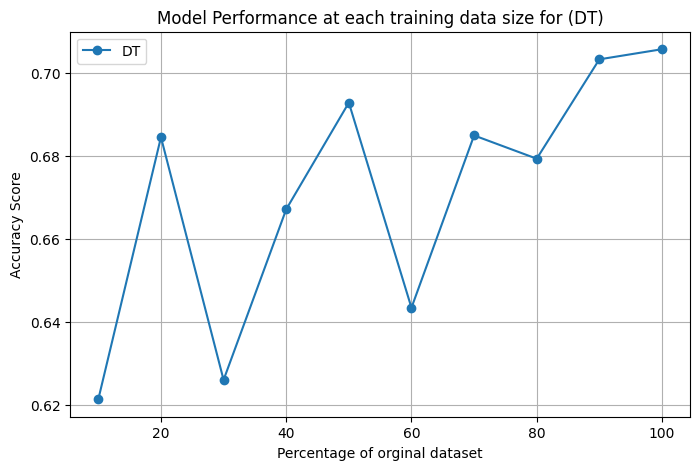

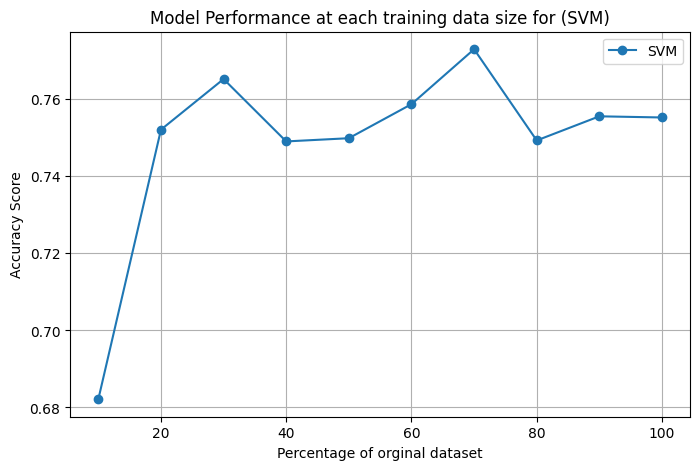

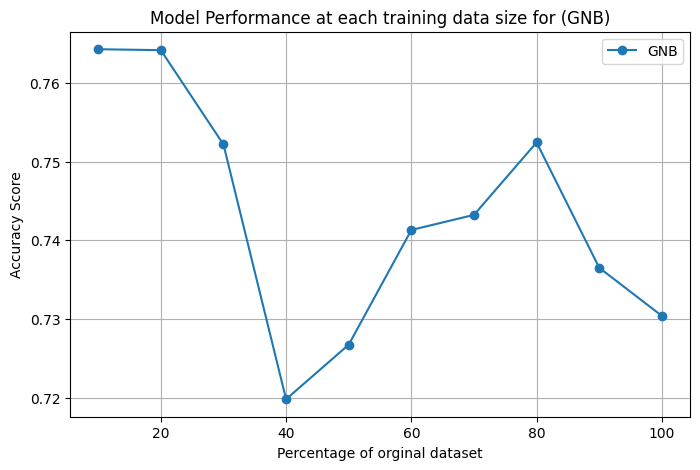

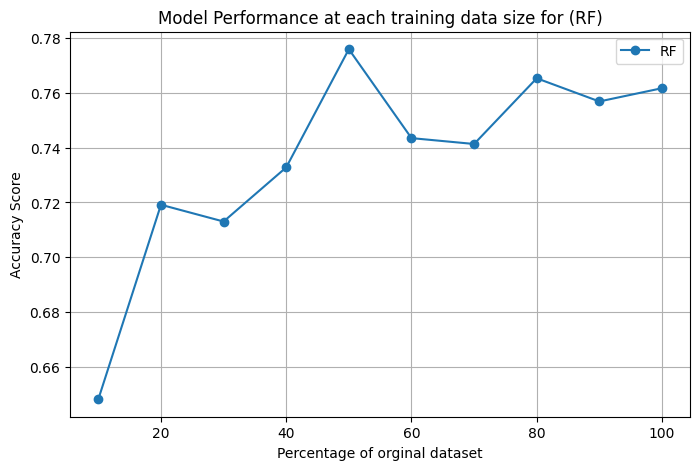

In [77]:
results = {"LogisticRegression": [],
           "KNN":[],
           "DT":[],
           "SVM":[],
           "GNB":[],
           "RF":[]
          }

for size in increments:
    sample_size = int(len(x_copy) * size)
    # x_copy has same amount of data as the normal dataframe 

    df_sampled = df_copy.sample(n = sample_size, random_state= 42)

    x_sampled = df_sampled.drop(columns=['Outcome'])
    y_sampled = df_sampled['Outcome']

    for name, m in models.items():

        pipeline = PipelineS([('smote', smote),
                              ('scaler', MinMaxScaler())
                         ,('classifier', m)
                         ])
        
        
        scores = cross_val_score(pipeline, x_sampled, y_sampled, cv=kf)
        m_scores = np.mean(scores) # Gets the mean value of the scores on each of the 9 training folds
        results[name].append(m_scores)
        
      
        

for name, scores in results.items():
    plt.figure(figsize=(8, 5))
    plt.plot([x * 100 for x in increments],scores, marker = "o" ,label=name)

    plt.xlabel("Percentage of orginal dataset")
    plt.ylabel("Accuracy Score")
    plt.title(f"Model Performance at each training data size for ({name})")
    plt.legend()
    plt.grid(True)

    plt.show()

Look at ROC curves

Smote Applied before the k cross validation 

100
200
300
400
500
600
700
800
900
1000


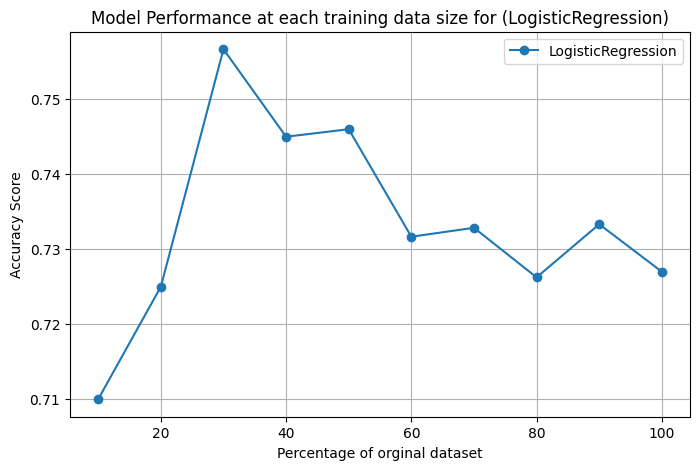

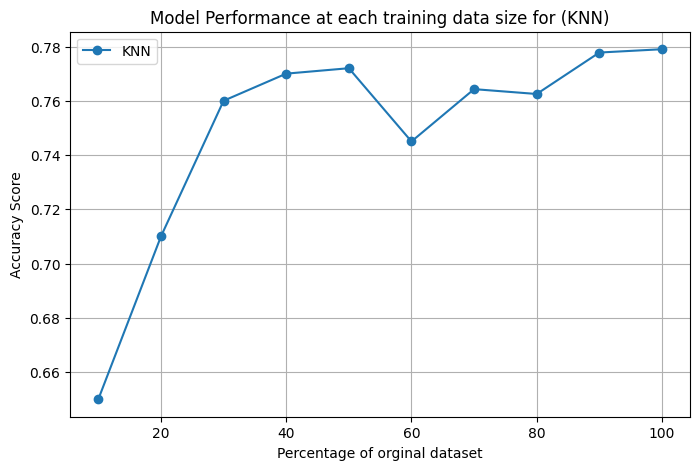

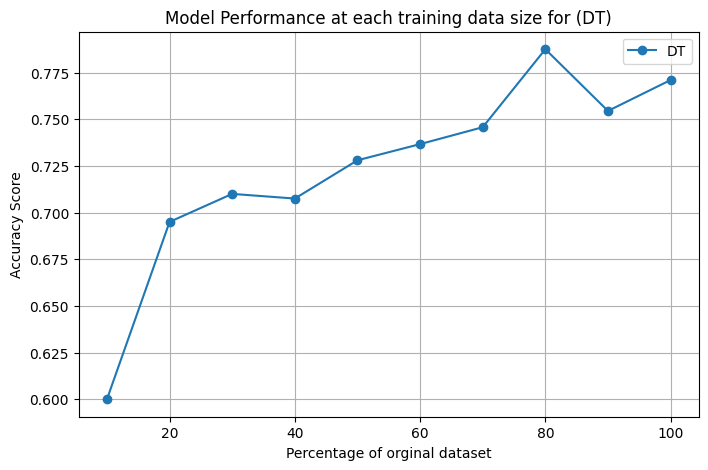

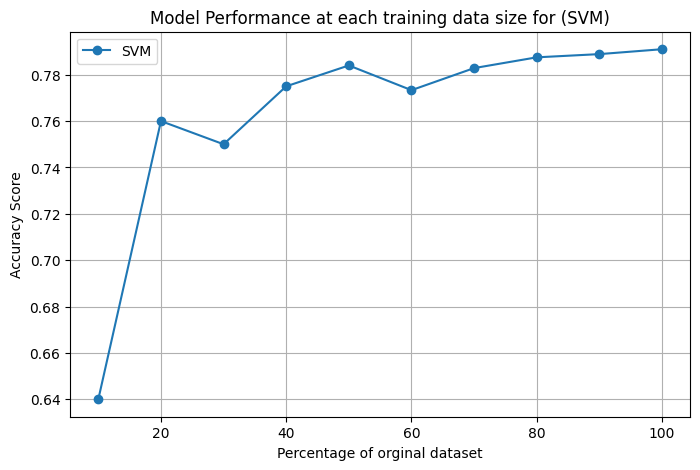

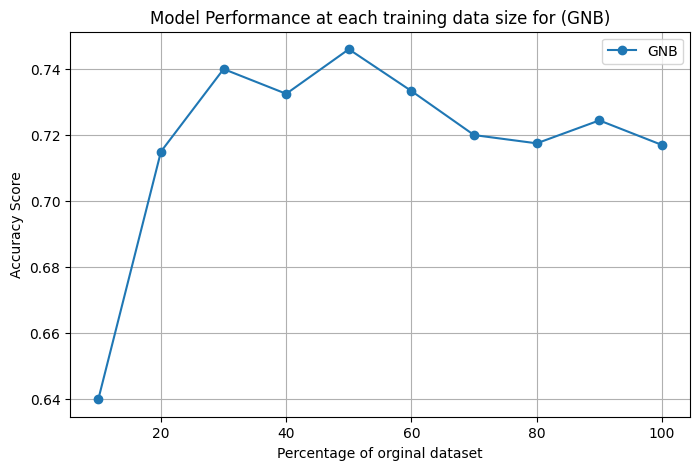

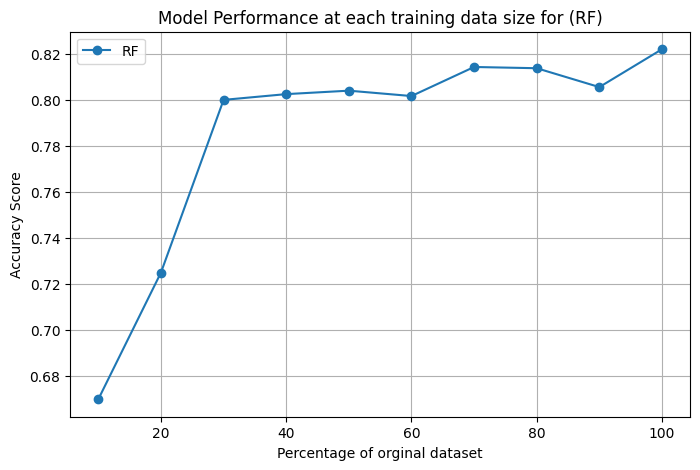

In [76]:
df_temp = x_re
df_temp['Outcome'] = y_re
# data from the smote test 

results = {"LogisticRegression": [],
           "KNN":[],
           "DT":[],
           "SVM":[],
           "GNB":[],
           "RF":[]
          }

for size in increments:
    sample_size = int(len(x_resample) * size)
    print (sample_size)
    # x_copy has same amount of data as the normal dataframe 

    df_sampled = df_temp.sample(n = sample_size, random_state= 42)

    x_sampled = df_sampled.drop(columns=['Outcome'])
    y_sampled = df_sampled['Outcome']

    for name, m in models.items():

        pipeline = Pipeline([('scaler', MinMaxScaler())
                         ,('classifier', m)
                         ])
        
        
        scores = cross_val_score(pipeline, x_sampled, y_sampled, cv=kf)
        m_scores = np.mean(scores) # Gets the mean value of the scores on each of the 9 training folds
        results[name].append(m_scores)
        

for name, scores in results.items():
    plt.figure(figsize=(8, 5))
    plt.plot([x * 100 for x in increments],scores, marker = "o" ,label=name)

    plt.xlabel("Percentage of orginal dataset")
    plt.ylabel("Accuracy Score")
    plt.title(f"Model Performance at each training data size for ({name})")
    plt.legend()
    plt.grid(True)

    plt.show()
        

Explainability/Interpretability

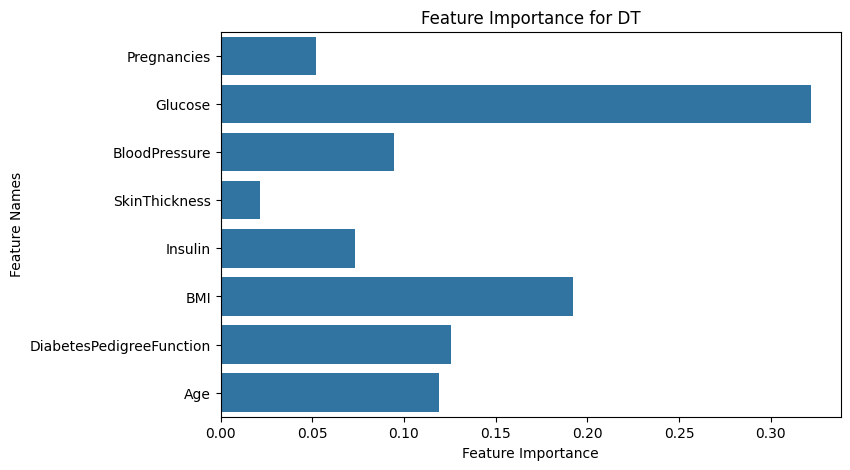

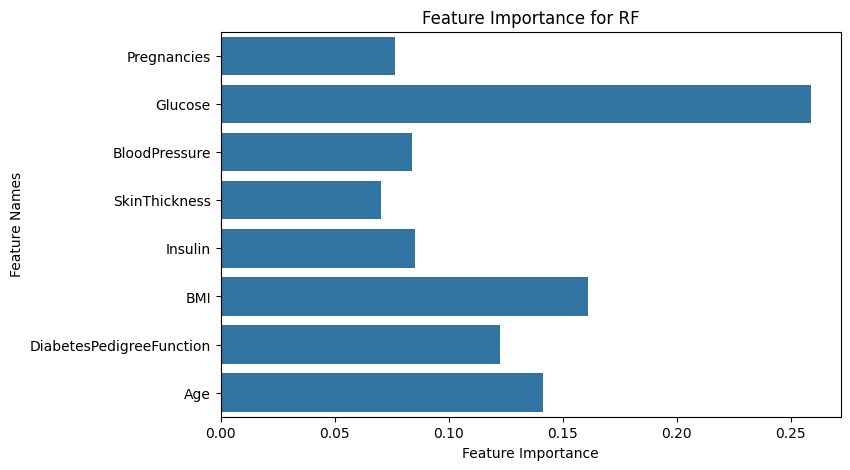

In [106]:

for name, m in models.items():
    

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', m)
    ])

    
    y_pred = cross_val_predict(pipeline, x_copy, y_copy, cv=kf)

   
       
    pipeline.fit(x_copy, y_copy)

        
    trained_model = pipeline.named_steps['classifier']
 
       

    
    if name == "DT" or name == "RF":
        feature_importance = trained_model.feature_importances_

        plt.figure(figsize=(8, 5))
        sns.barplot(x=feature_importance, y=x_copy.columns)
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature Names")
        plt.title(f"Feature Importance for {name}")
        plt.show()

     

    
    



SHAP

C:\Users\aaron\AppData\Local\Temp\ipykernel_19328\3934556294.py:37: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(concatenated_shap_vals, x_copy)


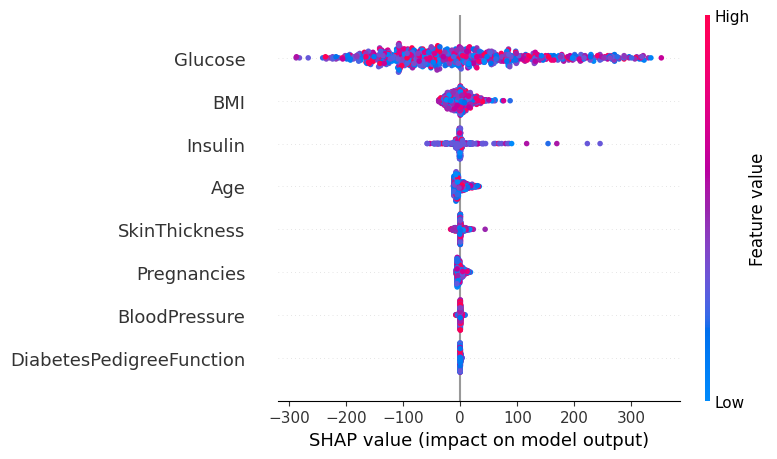

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier()

In [ ]:
import shap

for name, m in models.items():
    

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', m)
    ])

    
    y_pred = cross_val_predict(pipeline, x_copy, y_copy, cv=kf)

   
    shap_vals_list = []  

    for train_index, test_index in kf.split(x_copy, y_copy):
        x_train, x_test = x_copy.iloc[train_index], x_copy.iloc[test_index]
        y_train, y_test = y_copy.iloc[train_index], y_copy.iloc[test_index]

       
        pipeline.fit(x_train, y_train)

        
        trained_model = pipeline.named_steps['classifier']

       
        explainer = shap.Explainer(trained_model, x_test)  
        shap_vals = explainer(x_test)
        shap_vals_list.append(shap_vals)
        
    
    
    concatenated_shap_vals = np.concatenate([shap_vals.values for shap_vals in shap_vals_list], axis=0)

    # Use concatenated SHAP values for the summary plot
    shap.summary_plot(concatenated_shap_vals, x_copy)
    